In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

from SRIM import SRIM

# Make bigger fonts
plt.rc('font', size=12)

# Define reaction variables
M0 = 1.0078250 # amu projectile
M1 = 18.998403 # amu target

q1 = 1.0 # charge of projectile
q2 = 9.0 # charge of target

mu = M0 * M1 / ( M0 + M1 ) # reduced mass
q = q1 * q2 # charge of reaction

# Conversion factors
q_c = 1.60217662e-19 # C

In [2]:
# Read compound stopping data
H_in_CaH2 = SRIM( "stopping/H_in_CaF2.stop" )
H_in_HF = SRIM( "stopping/H_in_HF.stop" )

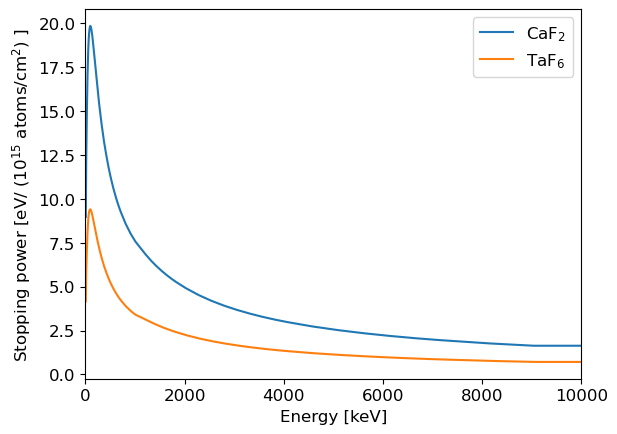

In [3]:
# Plot the stopping powers
energies = np.linspace( 10, 10000, 10000 )

data_CaH2 = [ H_in_CaH2.eval( energy ) for energy in energies ]
data_HF = [ H_in_HF.eval( energy ) for energy in energies ]

plt.plot( energies, data_CaH2, label=r"CaF$_{2}$" )
plt.plot( energies, data_HF, label=r"TaF$_{6}$" )

plt.xlim( 0, 10000 )

plt.xlabel( "Energy [keV]" )
plt.ylabel( r"Stopping power [eV/ (10$^{15}$ atoms/cm$^{2}$) ]" )

plt.legend()

plt.show()

In [4]:
# Read the element stopping data
H_in_F = SRIM( "stopping/H_in_F.stop" )
H_in_H = SRIM( "stopping/H_in_H.stop" )
H_in_Fe = SRIM( "stopping/H_in_Fe.stop" )
H_in_Ta = SRIM( "stopping/H_in_Ta.stop" )
H_in_Ca = SRIM( "stopping/H_in_Ca.stop" )

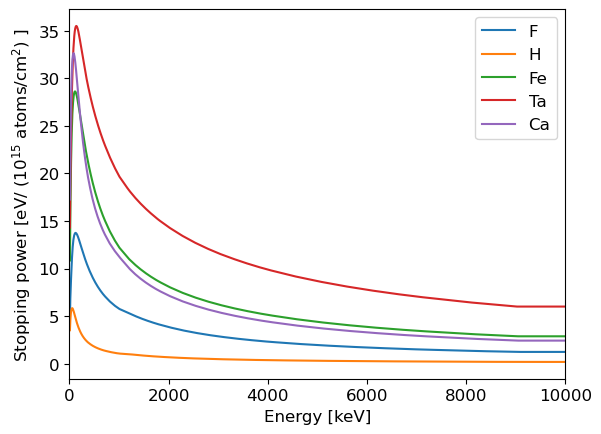

In [5]:
# Plot the stopping powers
energies = np.linspace( 10, 10000, 10000 )

data_F = [ H_in_F.eval( energy ) for energy in energies ]
data_H = [ H_in_H.eval( energy ) for energy in energies ]
data_Fe = [ H_in_Fe.eval( energy ) for energy in energies ]
data_Ta = [ H_in_Ta.eval( energy ) for energy in energies ]
data_Ca = [ H_in_Ca.eval( energy ) for energy in energies ]

plt.plot( energies, data_F, label="F" )
plt.plot( energies, data_H, label="H" )
plt.plot( energies, data_Fe, label="Fe" )
plt.plot( energies, data_Ta, label="Ta" )
plt.plot( energies, data_Ca, label="Ca" )

plt.xlim( 0, 10000 )

plt.xlabel( "Energy [keV]" )
plt.ylabel( r"Stopping power [eV/ (10$^{15}$ atoms/cm$^{2}$) ]" )

plt.legend()

plt.show()

In [6]:
# Get the effective stopping power for CaF2
def effective_stopping_CaF2( energy ):
    return H_in_CaH2.eval( energy ) + 2 * H_in_F.eval( energy )

# Get the effective stopping power for HF
def effective_stopping_HF( energy ):
    return H_in_Ta.eval( energy ) + 6 * H_in_F.eval( energy )

# Get the effective stopping power for F implanted in Fe
def effective_stopping_Fe( energy ):
    return H_in_Fe.eval( energy ) + H_in_F.eval( energy )

# Get the effective stopping power for F implanted in Ta
def effective_stopping_Ta( energy ):
    return H_in_Ta.eval( energy ) + H_in_F.eval( energy )

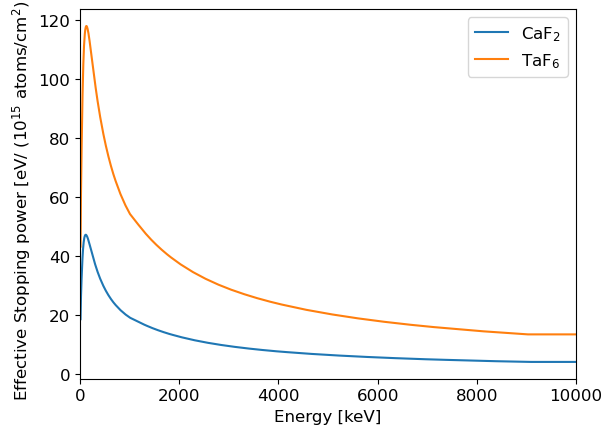

In [7]:
# Plot the effective stopping power for CaF2
energies = np.linspace( 10, 10000, 10000 )

data_CaF2 = [ effective_stopping_CaF2( energy ) for energy in energies ]
data_HF = [ effective_stopping_HF( energy ) for energy in energies ]

plt.plot( energies, data_CaF2, label=r"CaF$_{2}$" )
plt.plot( energies, data_HF, label=r"TaF$_{6}$" )

plt.xlim( 0, 10000 )

plt.xlabel( "Energy [keV]" )
plt.ylabel( r"Effective Stopping power [eV/ (10$^{15}$ atoms/cm$^{2}$) ]" )

plt.legend()

plt.show()

In [8]:
# Read all the extrapolations
extrap_pg1 = np.loadtxt( "extrap/19f_pg1.extrap" )
extrap_pa0 = np.loadtxt( "extrap/19f_pa0.extrap" )
extrap_pa1 = np.loadtxt( "extrap/19f_pa1.extrap" )
extrap_pa2 = np.loadtxt( "extrap/19f_pa2.extrap" )
extrap_pa3 = np.loadtxt( "extrap/19f_pa3.extrap" )
extrap_pa4 = np.loadtxt( "extrap/19f_pa4.extrap" )


# Function to convert laboratory energy to center-of-mass energy
def lab_to_cm( energy_lab ):
    return energy_lab * M1 / ( M1 + M0 )

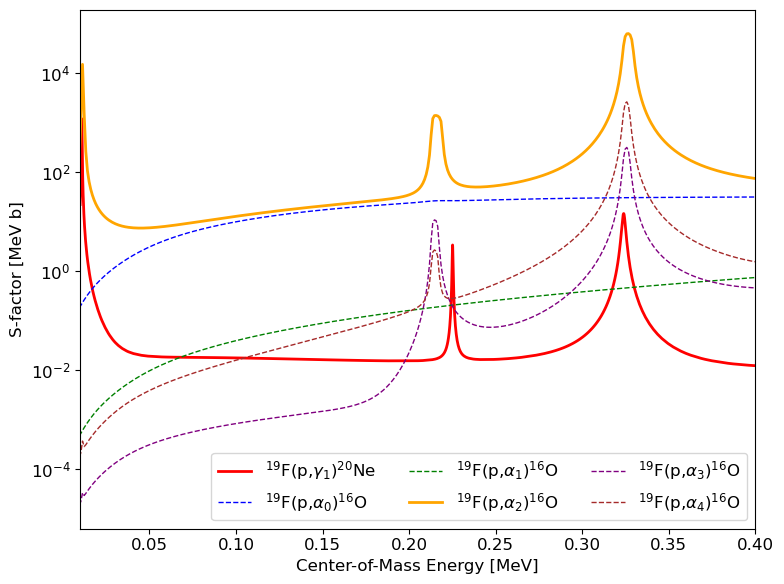

In [9]:
# Plot the extrapolations
plt.plot( extrap_pg1[:,0], extrap_pg1[:,4], label=r"$^{19}$F(p,$\gamma_{1}$)$^{20}$Ne", color="red",    lw=2 )
plt.plot( extrap_pa0[:,0], extrap_pa0[:,4], label=r"$^{19}$F(p,$\alpha_{0}$)$^{16}$O",  color="blue",   lw=1, ls="--" )
plt.plot( extrap_pa1[:,0], extrap_pa1[:,4], label=r"$^{19}$F(p,$\alpha_{1}$)$^{16}$O",  color="green",  lw=1, ls="--" )
plt.plot( extrap_pa2[:,0], extrap_pa2[:,4], label=r"$^{19}$F(p,$\alpha_{2}$)$^{16}$O",  color="orange", lw=2 )
plt.plot( extrap_pa3[:,0], extrap_pa3[:,4], label=r"$^{19}$F(p,$\alpha_{3}$)$^{16}$O",  color="purple", lw=1, ls="--" )
plt.plot( extrap_pa4[:,0], extrap_pa4[:,4], label=r"$^{19}$F(p,$\alpha_{4}$)$^{16}$O",  color="brown",  lw=1, ls="--" )

plt.xlim( 0.01, 0.4 )

plt.xlabel( "Center-of-Mass Energy [MeV]" )
plt.ylabel( "S-factor [MeV b]" )

plt.yscale( "log" )

plt.legend(ncol=3, loc="lower right")

plt.gcf().set_size_inches( 8, 6 )

plt.tight_layout()

plt.savefig( "figures/19f_pg_pa_sfactor.pdf" )
plt.show()

In [10]:
# Function to convert cross-section to S-factor
def cross_section_to_s_factor( energy_cm ):
    return 1 / np.exp( -0.989534 * q * np.sqrt( mu / ( energy_cm ) ) ) * energy_cm

# Function to convert center-of-mass energy to laboratory energy
def cm_to_lab( energy_cm ):
    return energy_cm * ( M1 + M0 ) / M1

# Function to convert laboratory energy to center-of-mass energy
def lab_to_cm( energy_lab ):
    return energy_lab * M1 / ( M1 + M0 )

In [26]:
# Read (p,g) data
juna = np.loadtxt( "data/JUNA_pg1.dat" )
couture = np.loadtxt( "data/Couture_pg1.dat" )

# Convert energies from lab to center-of-mass
juna[:,0] = lab_to_cm( juna[:,0] )
couture[:,0] = lab_to_cm( couture[:,0] )

# Convert the cross section to S-factor
juna[:,2] = 1.1 * juna[:,2] * cross_section_to_s_factor( juna[:,0] )
couture[:,2] = 1.5 * couture[:,2] * cross_section_to_s_factor( couture[:,0] )

# Convert the cross section error to S-factor error
juna[:,3] = juna[:,3] * cross_section_to_s_factor( juna[:,0] )
couture[:,3] = couture[:,3] * cross_section_to_s_factor( couture[:,0] )

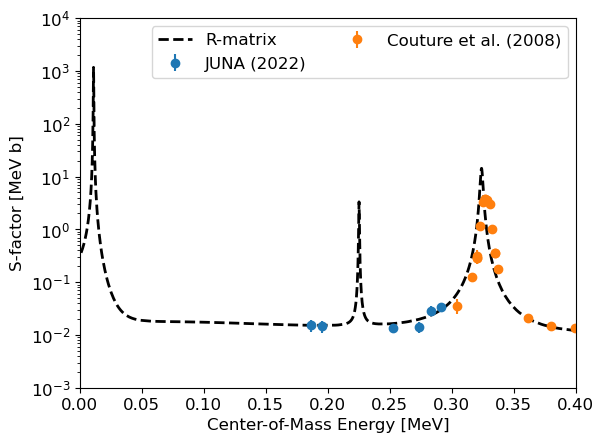

In [27]:
# Plot the (p,g) data with markers
plt.errorbar( juna[:,0], juna[:,2], yerr=juna[:,3], fmt="o", label="JUNA (2022)" )
plt.errorbar( couture[:,0], couture[:,2], yerr=couture[:,3], fmt="o", label="Couture et al. (2008)" )

plt.plot( extrap_pg1[:,0], extrap_pg1[:,4], label=r"R-matrix", color="black", lw=2, ls="--" )

plt.xlim( 0, 0.4 )
plt.ylim( 1e-3, 1e4 )

plt.xlabel( "Center-of-Mass Energy [MeV]" )
plt.ylabel( "S-factor [MeV b]" )

plt.yscale( "log" )

plt.legend(ncol=2)

plt.savefig( "figures/f19_pg1_literature.pdf" )
plt.show()

In [13]:
# Costants to conversion
barn_to_cm2 = 1e-24

# Infinitesimal of the yield integral
def infinitesimal( energy, stopping_power, cross_section ):
    # cross_graph wants energies in MeV, stop_graph in keV
    energy_cm = lab_to_cm( energy )
    cross = np.interp( energy_cm / 1e3, cross_section[:,0], cross_section[:,3] )
    stop = np.interp( energy_cm, stopping_power[:,0], stopping_power[:,1] )
    return barn_to_cm2 * cross / stop * 1e15 * 1e3 # 1e15 atoms/cm^2, 1e3 eV

In [14]:
# Calculate the yield
def calculate_yield( energy, delta_e, stopping_power, cross_section ):
    # Integrate the infinitesimal between [energy, energy - delta_e]
    return integrate.quad( infinitesimal, energy - delta_e, energy, args=(stopping_power, cross_section,), epsabs=1e-10 )[0]

In [15]:
# Create the energies you want to calculate (min, max, nsteps)
energies = np.linspace( 100, 400, 300 )
delta_e = 20

# Prepare numpy array for stopping powers with first columns energies and second stopping powers
stopping_power_HF = np.zeros( (1000, 2) )
stopping_power_HF[:,0] = np.linspace( 10, 1000, 1000 )
stopping_power_HF[:,1] = effective_stopping_HF( stopping_power_HF[:,0] )

stopping_power_CaF2 = np.zeros( (1000, 2) )
stopping_power_CaF2[:,0] = np.linspace( 10, 1000, 1000 )
stopping_power_CaF2[:,1] = effective_stopping_CaF2( stopping_power_CaF2[:,0] )

yield_pg1_hf, yield_pa1_hf, yield_pa2_hf, yield_pa3_hf, yield_pa4_hf = [], [], [], [], []
yield_pg1_caf2, yield_pa1_caf2, yield_pa2_caf2, yield_pa3_caf2, yield_pa4_caf2 = [], [], [], [], []
for energy in energies:
    yield_pg1_hf.append( calculate_yield( energy, delta_e, stopping_power_HF, extrap_pg1 ) )
    yield_pa1_hf.append( calculate_yield( energy, delta_e, stopping_power_HF, extrap_pa1 ) )
    yield_pa2_hf.append( calculate_yield( energy, delta_e, stopping_power_HF, extrap_pa2 ) )
    yield_pa3_hf.append( calculate_yield( energy, delta_e, stopping_power_HF, extrap_pa3 ) )
    yield_pa4_hf.append( calculate_yield( energy, delta_e, stopping_power_HF, extrap_pa4 ) )

    yield_pg1_caf2.append( calculate_yield( energy, delta_e, stopping_power_CaF2, extrap_pg1 ) )
    yield_pa1_caf2.append( calculate_yield( energy, delta_e, stopping_power_CaF2, extrap_pa1 ) )
    yield_pa2_caf2.append( calculate_yield( energy, delta_e, stopping_power_CaF2, extrap_pa2 ) )
    yield_pa3_caf2.append( calculate_yield( energy, delta_e, stopping_power_CaF2, extrap_pa3 ) )
    yield_pa4_caf2.append( calculate_yield( energy, delta_e, stopping_power_CaF2, extrap_pa4 ) )

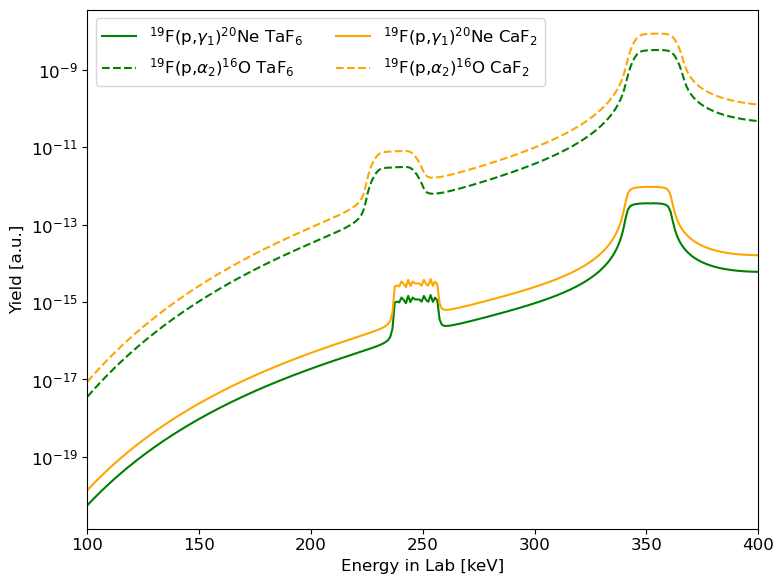

In [16]:
# Plot the yield
plt.plot( energies, yield_pg1_hf, label=r"$^{19}$F(p,$\gamma_{1}$)$^{20}$Ne TaF$_{6}$", color="green" )
plt.plot( energies, yield_pa2_hf, label=r"$^{19}$F(p,$\alpha_{2}$)$^{16}$O TaF$_{6}$",  color="green", ls="--" )

plt.plot( energies, yield_pg1_caf2, label=r"$^{19}$F(p,$\gamma_{1}$)$^{20}$Ne CaF$_{2}$", color="orange" )
plt.plot( energies, yield_pa2_caf2, label=r"$^{19}$F(p,$\alpha_{2}$)$^{16}$O CaF$_{2}$",  color="orange", ls="--" )

plt.xlabel("Energy in Lab [keV]")

plt.ylabel(r"Yield [a.u.]")

plt.yscale('log')
plt.xlim( energies[0], energies[-1] )

plt.legend(ncol=2)

plt.gcf().set_size_inches( 8, 6 )

plt.tight_layout()

plt.savefig( "figures/19f_yield.png" )
plt.show()

In [17]:
# Calculate the rate, definining the efficiency and current
per_hour = 3600 # s
current = 100 * pow( 10, -6 ) # A

efficiency = 0.68 # for Aluminum holder

rate_pg1_hf = np.array( yield_pg1_hf ) * current / q_c * 0.3 * per_hour
rate_pa2_hf = np.array( yield_pa2_hf ) * current / q_c * 0.6 * per_hour

rate_pg1_caf2 = np.array( yield_pg1_caf2 ) * current / q_c * 0.3 * per_hour
rate_pa2_caf2 = np.array( yield_pa2_caf2 ) * current / q_c * 0.6 * per_hour

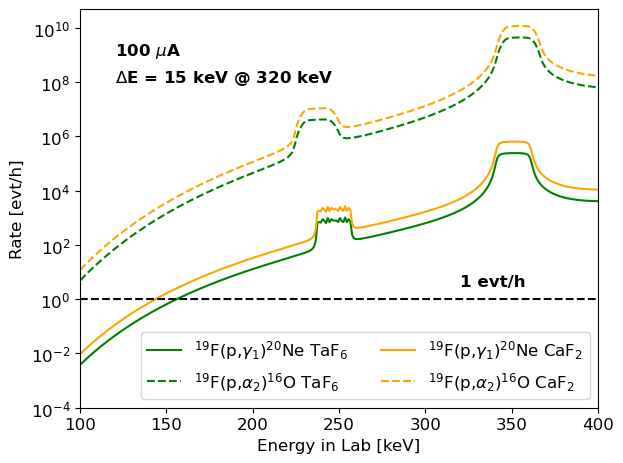

In [18]:
# Plot the rate
plt.rcParams.update({'font.size': 12})

plt.plot( energies, rate_pg1_hf, label=r"$^{19}$F(p,$\gamma_{1}$)$^{20}$Ne TaF$_{6}$", color="green" )
plt.plot( energies, rate_pa2_hf, label=r"$^{19}$F(p,$\alpha_{2}$)$^{16}$O TaF$_{6}$",  color="green", ls="--" )
plt.plot( energies, rate_pg1_caf2, label=r"$^{19}$F(p,$\gamma_{1}$)$^{20}$Ne CaF$_{2}$", color="orange" )
plt.plot( energies, rate_pa2_caf2, label=r"$^{19}$F(p,$\alpha_{2}$)$^{16}$O CaF$_{2}$",  color="orange", ls="--" )

plt.xlabel("Energy in Lab [keV]")
plt.ylabel(r"Rate [evt/h]")

plt.yscale('log')
plt.xlim( energies[0], energies[-1] )

# Bold text
plt.text( 120, 1e9, "100 $\mu$A", fontsize=12, fontweight='bold' )
plt.text( 120, 1e8, r"$\Delta$E = 15 keV @ 320 keV", fontsize=12, fontweight='bold' )

plt.axhline( y=1, color="black", ls="--" )
plt.text( 320, 3, "1 evt/h", fontsize=12, fontweight='bold' )

plt.legend(ncol=2)

plt.ylim( bottom=1e-4 )

plt.tight_layout()

plt.savefig( "figures/19f_rate.png" )
plt.show()

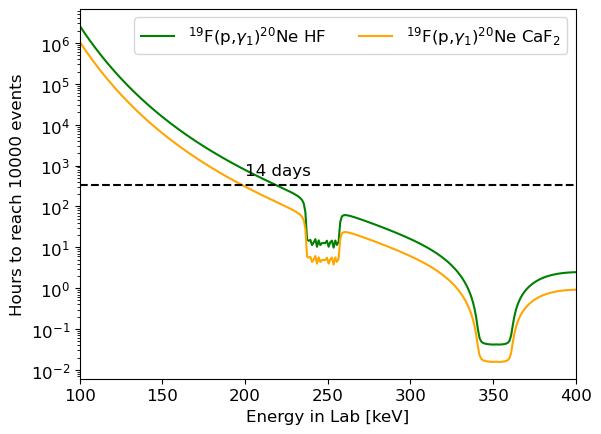

In [19]:
# Plot number of hours to reach 10000
hours_pg1_hf = 10000 / rate_pg1_hf
hours_pa2_hf = 10000 / rate_pa2_hf

hours_pg1_caf2 = 10000 / rate_pg1_caf2
hours_pa2_caf2 = 10000 / rate_pa2_caf2

plt.plot( energies, hours_pg1_hf, label=r"$^{19}$F(p,$\gamma_{1}$)$^{20}$Ne HF", color="green" )
#plt.plot( energies, hours_pa2_hf, label=r"$^{19}$F(p,$\alpha_{2}$)$^{16}$O HF",  color="green", ls="--" )
plt.plot( energies, hours_pg1_caf2, label=r"$^{19}$F(p,$\gamma_{1}$)$^{20}$Ne CaF$_{2}$", color="orange" )
#plt.plot( energies, hours_pa2_caf2, label=r"$^{19}$F(p,$\alpha_{2}$)$^{16}$O CaF$_{2}$",  color="orange", ls="--" )

# Put line at 14 days
plt.axhline( y=14*24, color="black", ls="--" )
plt.text( 200, 25*24, "14 days", color="black" )

plt.xlabel("Energy in Lab [keV]")
plt.ylabel(r"Hours to reach 10000 events")

plt.yscale('log')
plt.xlim( energies[0], energies[-1] )

plt.legend(ncol=2)

plt.savefig( "figures/19f_rate_current.png" )
plt.show()

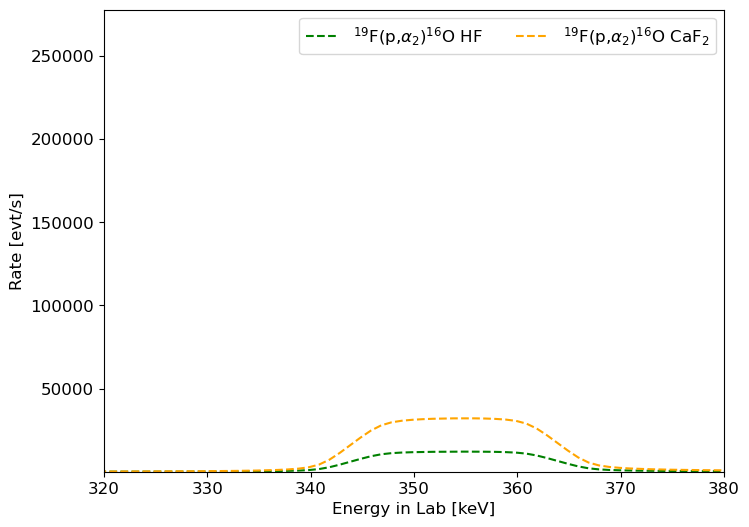

In [20]:
# Plot around the 350 regions only the rate
scale = 0.01 / 3600

#plt.plot( energies, rate_pg1_hf, label=r"$^{19}$F(p,$\gamma_{1}$)$^{20}$Ne HF", color="green" )
plt.plot( energies, rate_pa2_hf * scale, label=r"$^{19}$F(p,$\alpha_{2}$)$^{16}$O HF",  color="green", ls="--" )
#plt.plot( energies, rate_pg1_caf2, label=r"$^{19}$F(p,$\gamma_{1}$)$^{20}$Ne CaF$_{2}$", color="orange" )
plt.plot( energies, rate_pa2_caf2 * scale, label=r"$^{19}$F(p,$\alpha_{2}$)$^{16}$O CaF$_{2}$",  color="orange", ls="--" )

plt.xlabel("Energy in Lab [keV]")
plt.ylabel(r"Rate [evt/s]")

#plt.yscale('log')
plt.xlim( 320, 380 )

plt.ylim( 1e7 * scale, 1e11 * scale )

plt.legend(ncol=2)

plt.gcf().set_size_inches( 8, 6 )

plt.show()

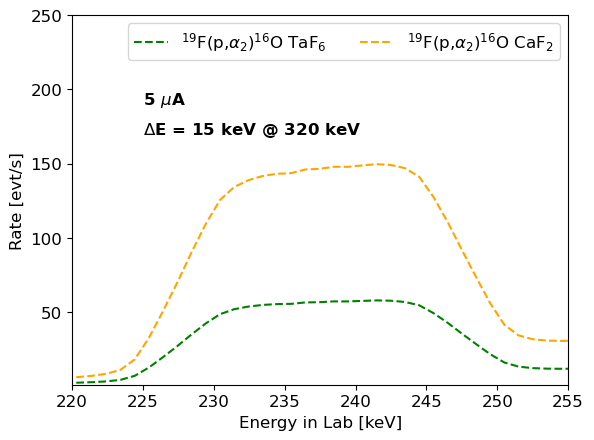

In [21]:
# Plot around the 350 regions only the rate
scale = 0.05 / 3600

#plt.plot( energies, rate_pg1_hf, label=r"$^{19}$F(p,$\gamma_{1}$)$^{20}$Ne HF", color="green" )
plt.plot( energies, rate_pa2_hf * scale, label=r"$^{19}$F(p,$\alpha_{2}$)$^{16}$O TaF$_{6}$",  color="green", ls="--" )
#plt.plot( energies, rate_pg1_caf2, label=r"$^{19}$F(p,$\gamma_{1}$)$^{20}$Ne CaF$_{2}$", color="orange" )
plt.plot( energies, rate_pa2_caf2 * scale, label=r"$^{19}$F(p,$\alpha_{2}$)$^{16}$O CaF$_{2}$",  color="orange", ls="--" )

# Bold text
plt.text( 225, 190, "5 $\mu$A", fontsize=12, fontweight='bold' )
plt.text( 225, 170, r"$\Delta$E = 15 keV @ 320 keV", fontsize=12, fontweight='bold' )
#plt.text( 225, 150, "0.01 s", fontsize=12, fontweight='bold' )

plt.xlabel("Energy in Lab [keV]")
plt.ylabel(r"Rate [evt/s]")

#plt.yscale('log')
plt.xlim( 220, 255 )

plt.ylim( 1, 2.5e2 )

plt.legend(ncol=2)

plt.savefig( "figures/19f_rate_scan.png" )
plt.show()

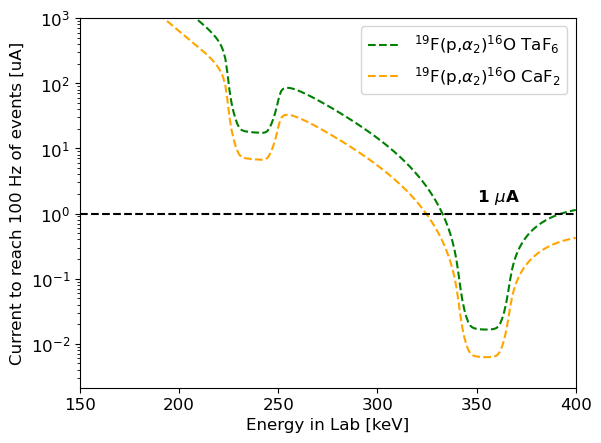

In [22]:
# Calculate necessary current to keep the rates at 100 Hz level
rate = 100 * 60 * 60 # Hz

currents = rate / np.array( [ rate_pg1_hf, rate_pa2_hf, rate_pg1_caf2, rate_pa2_caf2 ] ) * 200

# Plot the necessary current
#plt.plot( energies, currents[0], label=r"$^{19}$F(p,$\gamma_{1}$)$^{20}$Ne HF", color="green" )
plt.plot( energies, currents[1], label=r"$^{19}$F(p,$\alpha_{2}$)$^{16}$O TaF$_{6}$",  color="green", ls="--" )
#plt.plot( energies, currents[2], label=r"$^{19}$F(p,$\gamma_{1}$)$^{20}$Ne CaF$_{2}$", color="orange" )
plt.plot( energies, currents[3], label=r"$^{19}$F(p,$\alpha_{2}$)$^{16}$O CaF$_{2}$",  color="orange", ls="--" )

plt.axhline( y=1, color="black", ls="--" )
plt.text( 350, 1.5, r"1 $\mu$A", color="black", fontsize=12, fontweight='bold' )

plt.xlabel("Energy in Lab [keV]")
plt.ylabel(r"Current to reach 100 Hz of events [uA]")

plt.yscale('log')
plt.xlim( 150, energies[-1] )
plt.ylim( top=1e3 )

plt.legend(ncol=1)

plt.savefig( "figures/19f_current_limit.png" )
plt.show()